In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load dataframes
dip_df = pd.read_csv("dip-har-eff.csv")

# Gather info
dip_rows = dip_df.shape[0]
dip_cols = dip_df.shape[1]

dip_df = dip_df.values
dip_df = dip_df[np.arange(0, dip_rows), :]

dip_X = dip_df[:,1]
dip_Y = dip_df[:,2]
dip_X_max = np.max(dip_X)
dip_Y_max = np.max(dip_Y)

dip_X = np.true_divide(dip_X, dip_X_max)
dip_Y = np.true_divide(dip_Y, dip_Y_max)

# Config pyplot
# plt.xlim(0, max(dip_X))
# plt.ylim(0, max(dip_Y))

In [55]:
def calc_total_Error(row, col):
    return (b1*row+b0 - col)**2

def calc_b0_Error(row, col):
    return (b1*row+b0 - col)

def calc_b1_Error(row, col):
    return (b1*row+b0 - col) * row


# helper wrapper function for us to plug in error function to use
def useErrorFunction(errorFunction, args):
    return errorFunction(*args)
    
def mse(X,Y, errorFunction):
    errorsList = []
    for (row, col) in zip(X,Y):
        val = useErrorFunction(errorFunction, (row, col))
        errorsList.append(val)  
    ERROR_SUM = sum(errorsList)
    return ERROR_SUM / batchSize

def adjustWeight(weight, learn, temp_error):
    return weight - learn * temp_error

def takeRandomBatch(listLen, batchSize):
    return random.sample(range(listLen), batchSize)

def calcMean(results):
    results_sum = sum(results)
    return results_sum / batchSize

# Related to R Squared Error Loss
def calc_predicted(b0, b1, data):
    predicted_vals = map(lambda x: b1*x + b0, data)
    return predicted_vals

def calcSquareDiff(data):
    mean = calcMean(data)
    mean_diff = map(lambda actual: actual - mean, data)
    square_mean_diff = sum(map(lambda val: val**2, mean_diff))
    return square_mean_diff

def calcRSquared(actual, predicted):
    predicted_R_square = calcSquareDiff(predicted)
    actual_R_square = calcSquareDiff(actual)
    print(predicted_R_square)
    print(actual_R_square)
    return predicted_R_square / actual_R_square


# Gradient Descent Optimization : *Batch Size=10*

 b0: -0.330729019254 b1: 1.10361920672 Error: 0.337417295794
 b0: -0.254700618656 b1: 1.14777364798 Error: 0.0810465709872
 b0: -0.219964261841 b1: 1.16562820655 Error: 0.031069539964
 b0: -0.203522227164 b1: 1.17186400388 Error: 0.0213490384591
 b0: -0.195193652175 b1: 1.17297975929 Error: 0.0194271632973
 b0: -0.19047145532 b1: 1.17185200407 Error: 0.0189917527935
 b0: -0.187360232035 b1: 1.16975380094 Error: 0.018829239561
 b0: -0.184976451904 b1: 1.16724839228 Error: 0.0187129845127
 b0: -0.182928792733 b1: 1.16458480111 Error: 0.0186038547562
 b0: -0.181043826278 b1: 1.1618729559 Error: 0.018496639309
 b0: -0.179244584534 b1: 1.15916121502 Error: 0.0183914333024
 b0: -0.177496803324 b1: 1.15647068514 Error: 0.0182887384938
 b0: -0.175785125322 b1: 1.1538104134 Error: 0.0181888395072
 b0: -0.174102565555 b1: 1.15118411252 Error: 0.018091840458
 b0: -0.17244584794 b1: 1.1485931379 Error: 0.0179977467813
 b0: -0.17081334083 b1: 1.14603780541 Error: 0.0179065161852
 b0: -0.16920414307

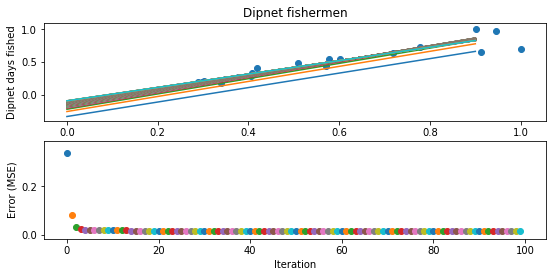

R-Squared
0
0.542190602556
0.0


In [56]:
%matplotlib inline
import matplotlib.pyplot as plt
import random

# init weights
b1 = 1.0
b0 = -0.5
batchSize = 10
epochs = 100

learn = 0.4

plt.figure(figsize=(9,4))

# Get current size
fig_size = plt.rcParams["figure.figsize"]
plt.rcParams["figure.figsize"] = [9.5,6]

plt.subplot(211)

plt.xlabel('Dipnet days fished')
plt.ylabel('Dipnet days fished')
plt.title('Dipnet fishermen')
plt.scatter(dip_X, dip_Y)
plt.pause(0.1);

batchSample = takeRandomBatch(len(dip_X), batchSize)
sample_X = [dip_X[i] for i in sorted(batchSample)]
sample_Y = [dip_Y[i] for i in sorted(batchSample)]


batch_epoch_ERRORS = []
for i in range(epochs):
    ERROR = mse(dip_X, dip_Y, calc_total_Error)
    batch_epoch_ERRORS.append(ERROR)
    b0_temp_error = mse(sample_X, sample_Y, calc_b0_Error)
    b1_temp_error = mse(sample_X, sample_Y, calc_b1_Error)
    b0 = adjustWeight(b0, learn, b0_temp_error)
    b1 = adjustWeight(b1, learn, b1_temp_error)
    print(" b0: " + str(b0) + " b1: " + str(b1) + " Error: " + str(ERROR))
    # How to plot the graph
    X_test = np.arange(0,1,0.1)
    plt.plot (X_test, b1*X_test + b0)
    plt.pause(0.1)
    
plt.subplot(212)
plt.xlabel('Iteration')
plt.ylabel('Error (MSE)')
    
for count, value in enumerate(batch_10_ERRORS):
    plt.scatter(count,value)

plt.subplots_adjust(bottom=1.00, top=1.75)
plt.show()


predicted = calc_predicted(b0,b1,sample_X)
print('R-Squared')
print(calcRSquared(sample_Y, predicted))